In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

## Exploratory Data Analysis (EDA)

In [3]:
print(data.head(10))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6


In [4]:
print(data.tail(10))

     Unnamed: 0     TV  Radio  Newspaper  Sales
190         191   39.5   41.1        5.8   10.8
191         192   75.5   10.8        6.0    9.9
192         193   17.2    4.1       31.6    5.9
193         194  166.8   42.0        3.6   19.6
194         195  149.7   35.6        6.0   17.3
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [5]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


## Data Cleaning

In [7]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


## Data Visualization

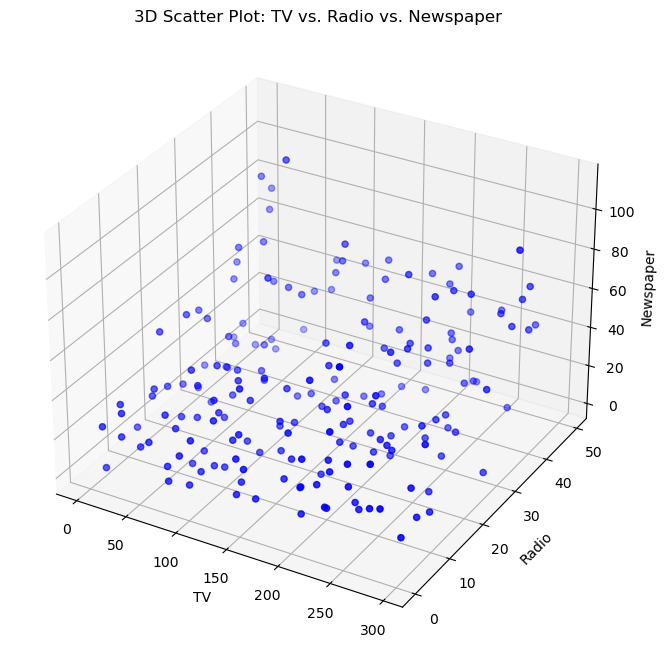

In [8]:
# 3D Scatter Plot: TV vs. Radio vs. Newspaper
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'], data['Radio'], data['Newspaper'], c='blue', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
plt.title('3D Scatter Plot: TV vs. Radio vs. Newspaper')
plt.show()

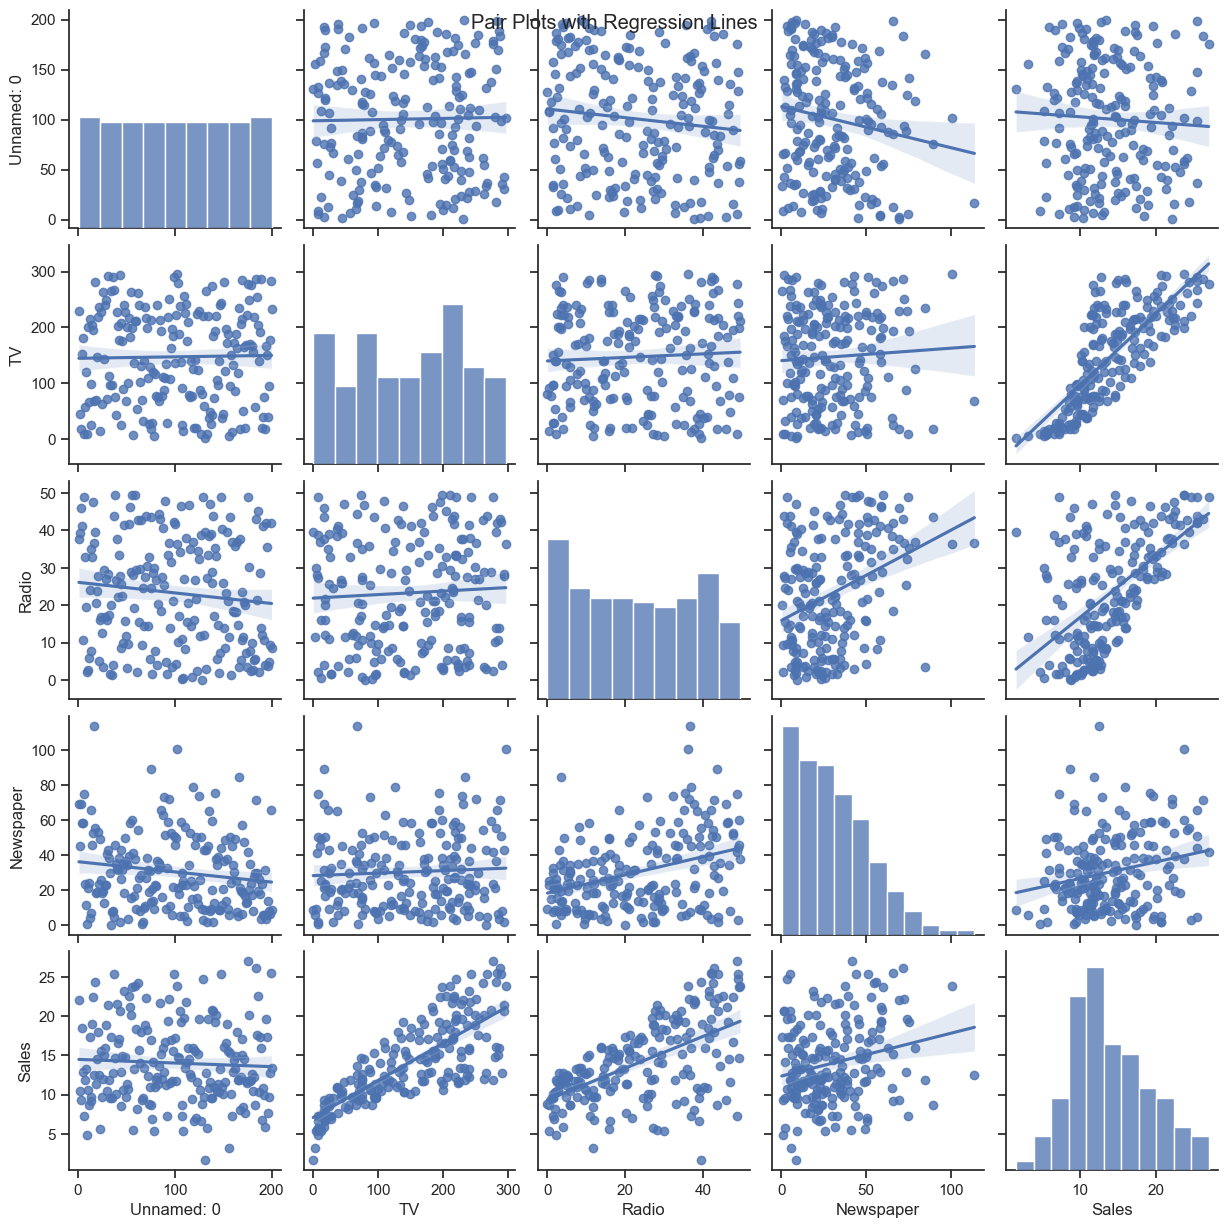

In [9]:
# Pair Plots with Regression Lines
sns.set(style="ticks")
sns.pairplot(data, kind="reg")
plt.suptitle('Pair Plots with Regression Lines')
plt.show()

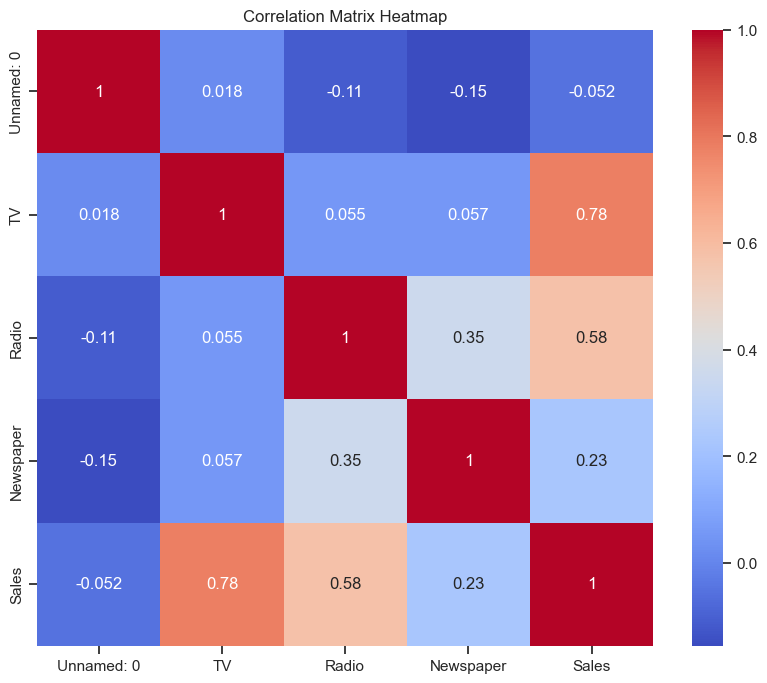

In [10]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
# Extracting sales data
sales_data = data[['TV', 'Radio', 'Newspaper', 'Sales']]

# Summing up sales across different channels
total_sales = sales_data.sum()

# Creating a 3D pie chart using Plotly
fig = go.Figure(data=[go.Pie(
    labels=total_sales.index[:-1],
    values=total_sales[:-1],
    marker=dict(line=dict(color='black', width=1.5)),
)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', pull=[0.1, 0.1, 0.1], opacity=0.7)
fig.update_layout(title_text='Sales Distribution Across TV, Radio, and Newspaper', scene=dict(aspectmode="cube"))

fig.show()

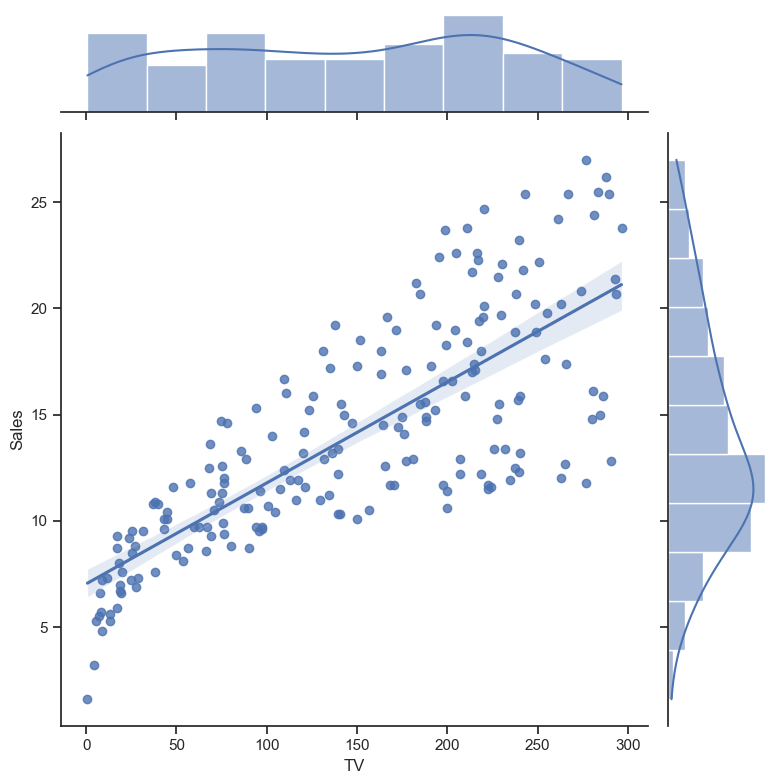

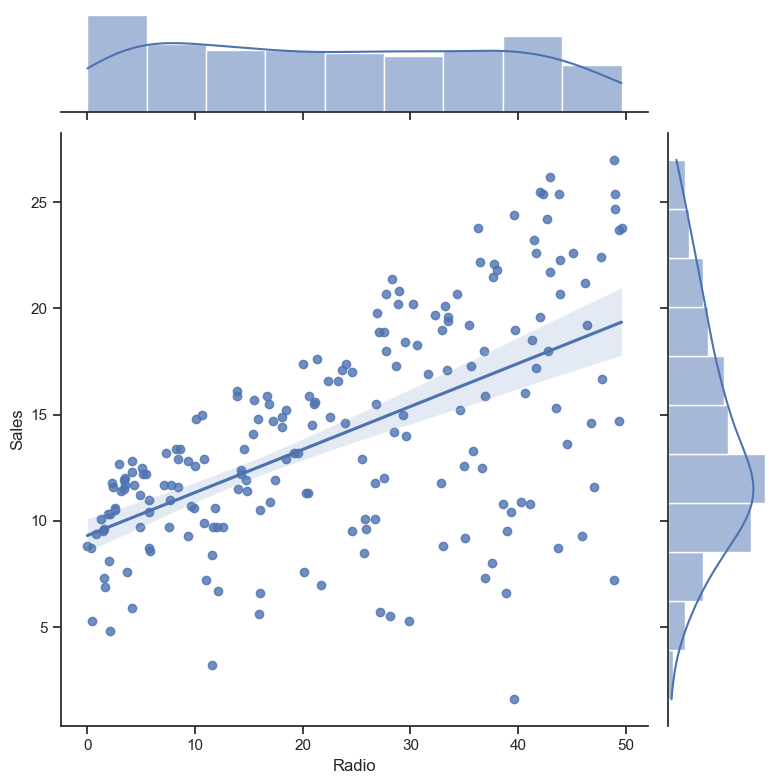

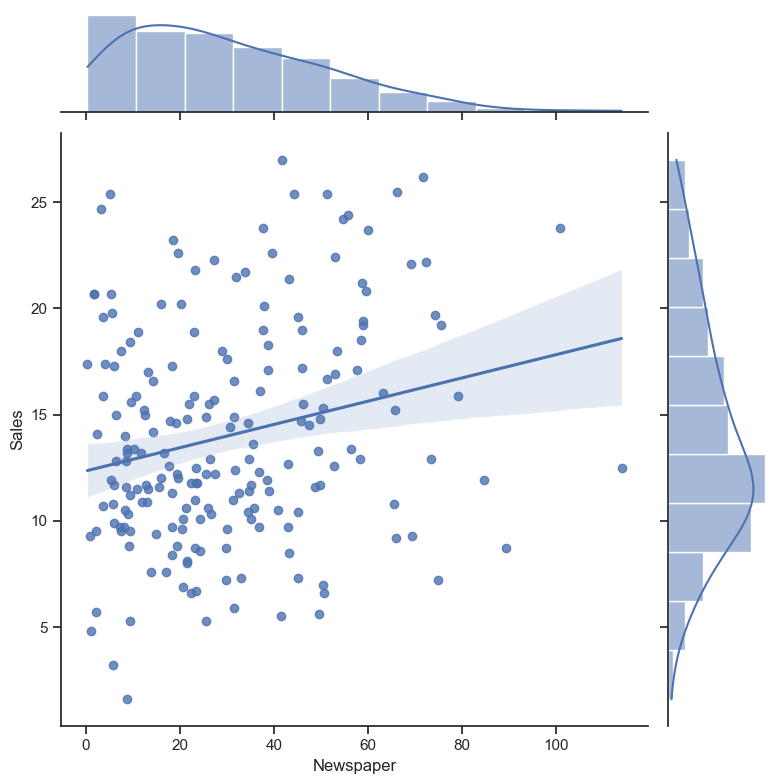

In [12]:
# Joint Plots
sns.jointplot(x='TV', y='Sales', data=data, kind='reg', height=8)
sns.jointplot(x='Radio', y='Sales', data=data, kind='reg', height=8)
sns.jointplot(x='Newspaper', y='Sales', data=data, kind='reg', height=8)
plt.show()

In [13]:
# Interactive 3D Scatter Plot: TV vs. Radio vs. Sales
fig = px.scatter_3d(data, x='TV', y='Radio', z='Newspaper', opacity=0.7, title='Interactive 3D Scatter Plot: TV vs. Radio vs. Newspaper')
fig.show()

# Interactive Violin Plots
fig = px.violin(data, y='Sales', x='TV', box=True, points="all", title='Interactive Violin Plot: Sales vs. TV Spending')
fig.show()
fig = px.violin(data, y='Sales', x='Radio', box=True, points="all", title='Interactive Violin Plot: Sales vs. Radio Spending')
fig.show()
fig = px.violin(data, y='Sales', x='Newspaper', box=True, points="all", title='Interactive Violin Plot: Sales vs. Newspaper Spending')
fig.show()

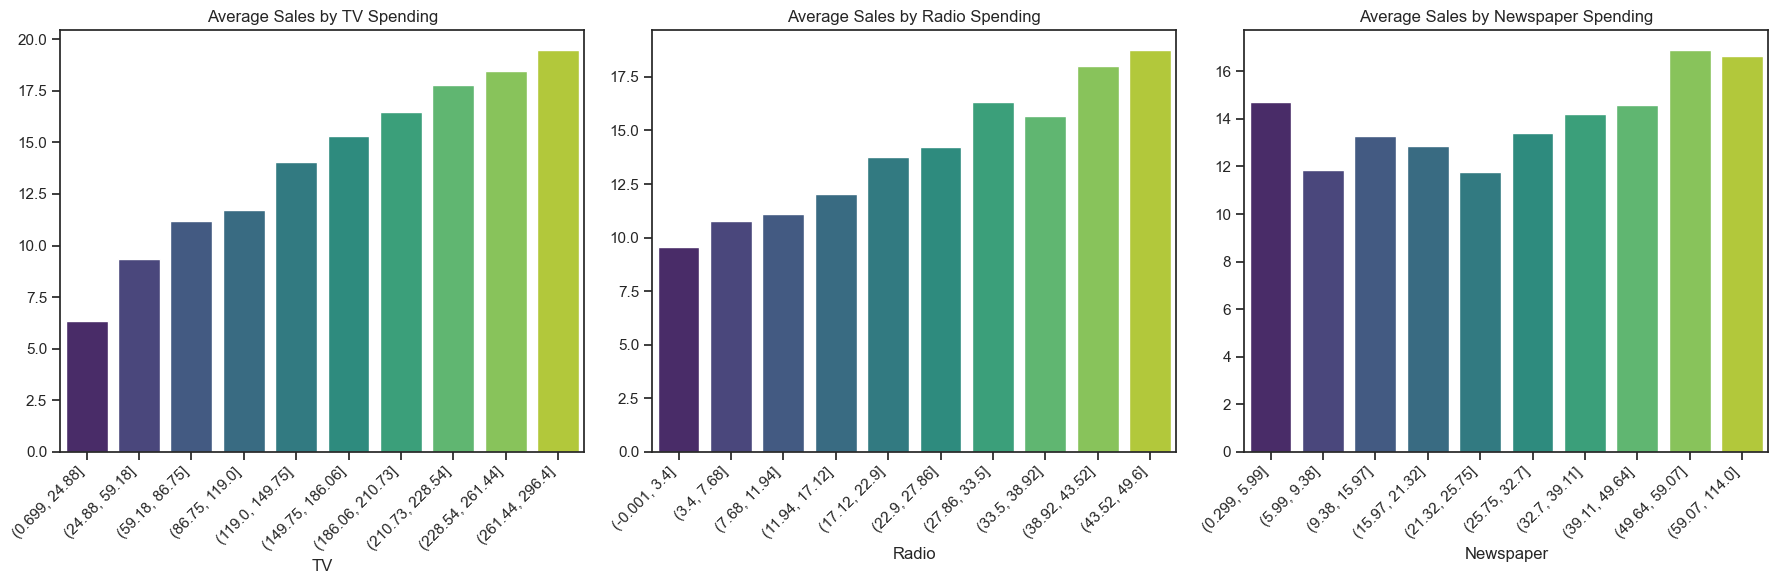

In [14]:
# Bar Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar Plot for Average Sales by TV Spending
average_sales_tv = data.groupby(pd.qcut(data['TV'], q=10, duplicates='drop'))['Sales'].mean()
sns.barplot(x=average_sales_tv.index, y=average_sales_tv.values, ax=axes[0], palette='viridis')
axes[0].set_title('Average Sales by TV Spending')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Bar Plot for Average Sales by Radio Spending
average_sales_radio = data.groupby(pd.qcut(data['Radio'], q=10, duplicates='drop'))['Sales'].mean()
sns.barplot(x=average_sales_radio.index, y=average_sales_radio.values, ax=axes[1], palette='viridis')
axes[1].set_title('Average Sales by Radio Spending')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Bar Plot for Average Sales by Newspaper Spending
average_sales_newspaper = data.groupby(pd.qcut(data['Newspaper'], q=10, duplicates='drop'))['Sales'].mean()
sns.barplot(x=average_sales_newspaper.index, y=average_sales_newspaper.values, ax=axes[2], palette='viridis')
axes[2].set_title('Average Sales by Newspaper Spending')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [15]:
X = data.drop(['TV', 'Radio', 'Newspaper'], axis=1)
y = data['Sales']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (for algorithms that benefit from it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Evaluation

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model.__class__.__name__} Metrics:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}\n')

## Linear Regression Model

In [17]:
# Linear Regression
print("\nLinear Regression Model:")
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
evaluate_model(linear_reg_model, X_test_scaled, y_test)



Linear Regression Model:
LinearRegression Metrics:
Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R-squared: 1.0000




Sample Prediction:
Actual Value: 24.7
Predicted Value: 24.700000000000003
Prediction Error: -3.552713678800501e-15


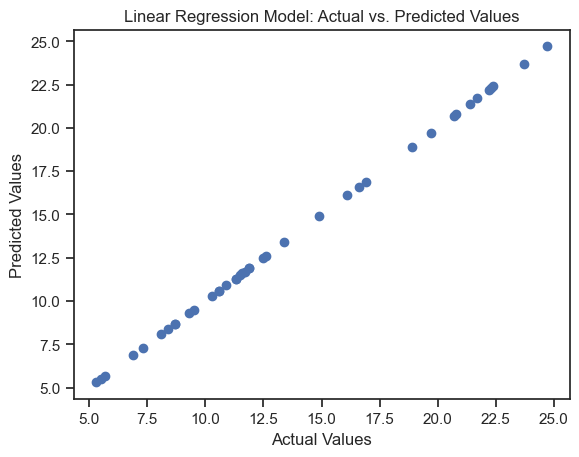

In [18]:
# Predictions on a sample data point
sample_data_point = X_test_scaled[4, :]
predicted_value = linear_reg_model.predict([sample_data_point])
actual_value = y_test.iloc[4]  # Assuming y_test is a pandas Series
print("\nSample Prediction:")
print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value[0])
print("Prediction Error:", actual_value - predicted_value[0])

# Visualize the model predictions vs. actual values
plt.scatter(y_test, linear_reg_model.predict(X_test_scaled))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model: Actual vs. Predicted Values")
plt.show()

# Random Forest Model

In [19]:
# Random Forest
print("\nRandom Forest Model:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)



Random Forest Model:
RandomForestRegressor Metrics:
Mean Squared Error: 0.0072
Mean Absolute Error: 0.0627
R-squared: 0.9998




Sample Prediction:
Actual Value: 11.9
Predicted Value: 2.689999999999998
Prediction Error: 9.210000000000003


C:\Users\HP LIFE\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\HP LIFE\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



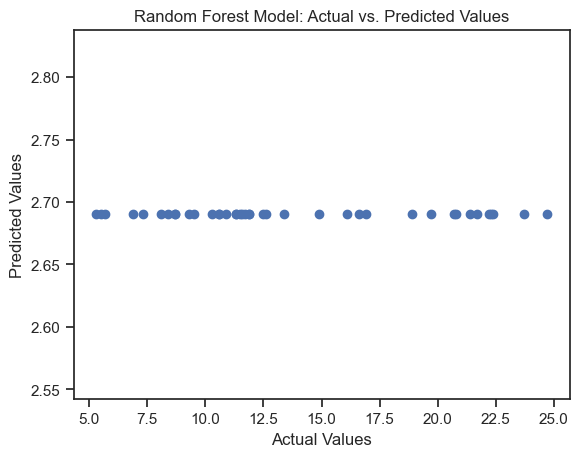

In [20]:
# Predictions on a sample data point
sample_data_point = X_test_scaled[12, :]
predicted_value = rf_model.predict([sample_data_point])
actual_value = y_test.iloc[12]  # Assuming y_test is a pandas Series
print("\nSample Prediction:")
print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value[0])
print("Prediction Error:", actual_value - predicted_value[0])

# Visualize the model predictions vs. actual values
plt.scatter(y_test, rf_model.predict(X_test_scaled))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Model: Actual vs. Predicted Values")
plt.show()


## XGBoost Model

In [21]:
# XGBoost
print("\nXGBoost Model:")
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)


XGBoost Model:
XGBRegressor Metrics:
Mean Squared Error: 0.0324
Mean Absolute Error: 0.1174
R-squared: 0.9990




Sample Prediction:
Actual Value: 22.2
Predicted Value: 1.8246323
Prediction Error: 20.375367712974548


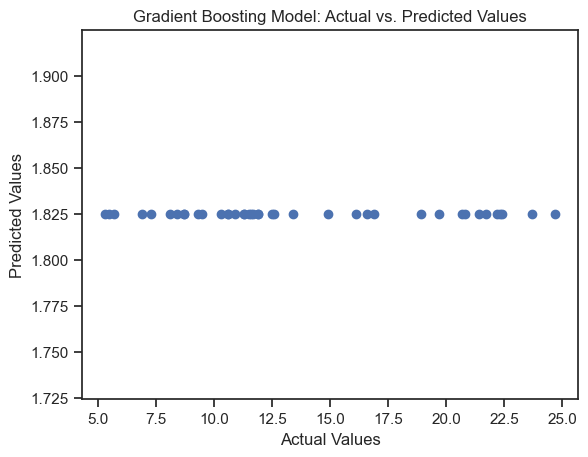

In [22]:
# Predictions on a sample data point
sample_data_point = X_test_scaled[23, :]
predicted_value = xgb_model.predict([sample_data_point])
actual_value = y_test.iloc[23]  # Assuming y_test is a pandas Series
print("\nSample Prediction:")
print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value[0])
print("Prediction Error:", actual_value - predicted_value[0])

# Visualize the model predictions vs. actual values
plt.scatter(y_test, xgb_model.predict(X_test_scaled))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Model: Actual vs. Predicted Values")
plt.show()
